<a href="https://colab.research.google.com/github/luan-prates/bootcamp-ds-aplicada-alura-2021/blob/main/Projeto_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bootcamp de Data Science Alura
## Projeto do módulo 1 

---

### by: Luan Rocha Prates

# Carregando e investigando os Dados 

In [87]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np

In [88]:
plt.style.use("seaborn-darkgrid")

In [89]:
df_casos = pd.read_csv('/content/drive/My Drive/_datasets/integrasus.csv', sep=';', encoding='utf-8' , thousands='.', decimal=',',engine='python',error_bad_lines=False)

In [105]:
#df_casos.head()
#df_casos.tail()
#df_casos.describe()
#df_casos.shape
df_casos.columns
#df_casos.dtypes

Index(['id', 'codigo_paciente', 'id_redcap', 'classificacao_estado_redcap',
       'id_esus', 'classificacao_estado_esus', 'classificacao_final_esus',
       'evolucao_caso_esus', 'cbo_esus', 'profissional_saude_esus',
       'nome_paciente', 'nome_mae', 'cns', 'cpf', 'pais_paciente',
       'estado_paciente', 'codigo_municipio_paciente', 'municipio_paciente',
       'bairro_paciente', 'bairro_paciente_geocoder', 'endereco_paciente',
       'cep_paciente', 'latitude_endereco_paciente',
       'longitude_endereco_paciente', 'precisao_geocoder', 'sexo_paciente',
       'idade_paciente', 'faixa_etaria', 'data_nascimento',
       'telefone_paciente', 'data_notificacao', 'data_inicio_sintomas',
       'endereco_geocoder', 'data_solicitacao_exame', 'data_coleta_exame',
       'data_resultado_exame', 'resultado_final_exame', 'laboratorio_exame',
       'tipo_teste_exame', 'requisicao_gal', 'obito_confirmado', 'data_obito',
       'local_obito', 'tipo_local_obito', 'id_sivep',
       'classifi

In [404]:
df_casos.columns = ['id', 'codigo_paciente', 'id_redcap', 'classificacao_estado_redcap',
       'id_esus', 'classificacao_estado_esus', 'classificacao_final_esus',
       'evolucao_caso_esus', 'cbo_esus', 'profissional_saude_esus',
       'nome_paciente', 'nome_mae', 'cns', 'cpf', 'pais_paciente',
       'estado_paciente', 'codigo_municipio_paciente', 'municipio_paciente',
       'bairro_paciente', 'bairro_paciente_geocoder', 'endereco_paciente',
       'cep_paciente', 'latitude','longitude',
        'precisao_geocoder', 'sexo_paciente',
       'idade_paciente', 'faixa_etaria', 'data_nascimento',
       'telefone_paciente', 'data_notificacao', 'data_inicio_sintomas',
       'endereco_geocoder', 'data_solicitacao_exame', 'data_coleta_exame',
       'data_resultado_exame', 'resultado_final_exame', 'laboratorio_exame',
       'tipo_teste_exame', 'requisicao_gal', 'obito_confirmado', 'data_obito',
       'local_obito', 'tipo_local_obito', 'id_sivep',
       'classificacao_estado_sivep', 'data_internacao_sivep',
       'data_entrada_uti_sivep', 'data_saida_uti_sivep', 'evolucao_caso_sivep',
       'data_evolucao_caso_sivep', 'comorbidade_puerpera_sivep',
       'comorbidade_cardiovascular_sivep', 'comorbidade_hematologia_sivep',
       'comorbidade_sindrome_down_sivep', 'comorbidade_hepatica_sivep',
       'comorbidade_asma_sivep', 'comorbidade_diabetes_sivep',
       'comorbidade_neurologia_sivep', 'comorbidade_pneumopatia_sivep',
       'comorbidade_imunodeficiencia_sivep', 'comorbidade_renal_sivep',
       'comorbidade_obesidade_sivep', 'comorbidade_hiv',
       'comorbidade_neoplasias']

In [91]:
datas = ['data_nascimento','data_notificacao','data_inicio_sintomas','data_solicitacao_exame', 'data_coleta_exame','data_resultado_exame',
         'data_internacao_sivep','data_evolucao_caso_sivep','data_entrada_uti_sivep','data_saida_uti_sivep','data_obito']


In [92]:
for data in datas:
  df_casos[data] = df_casos[data].astype('datetime64', errors = 'ignore')

In [93]:
categorias = ['id_redcap','classificacao_estado_redcap', 'id_esus', 'classificacao_estado_esus', 'classificacao_final_esus',
              'evolucao_caso_esus', 'cbo_esus', 'profissional_saude_esus','pais_paciente','estado_paciente', 
              'municipio_paciente', 'bairro_paciente_geocoder','sexo_paciente','faixa_etaria',
              'resultado_final_exame', 'laboratorio_exame', 'tipo_teste_exame', 'requisicao_gal', 
              'obito_confirmado','local_obito', 'tipo_local_obito', 'id_sivep','classificacao_estado_sivep', 'evolucao_caso_sivep', 
              'comorbidade_puerpera_sivep', 'comorbidade_cardiovascular_sivep', 'comorbidade_hematologia_sivep','comorbidade_sindrome_down_sivep', 
              'comorbidade_hepatica_sivep', 'comorbidade_asma_sivep', 'comorbidade_diabetes_sivep','comorbidade_neurologia_sivep', 
              'comorbidade_pneumopatia_sivep', 'comorbidade_imunodeficiencia_sivep', 'comorbidade_renal_sivep','comorbidade_obesidade_sivep', 
              'comorbidade_hiv','comorbidade_neoplasias']

In [94]:
for categoria in categorias:
  df_casos[categoria] = df_casos[categoria].astype('category', errors = 'ignore')

### slice and dice

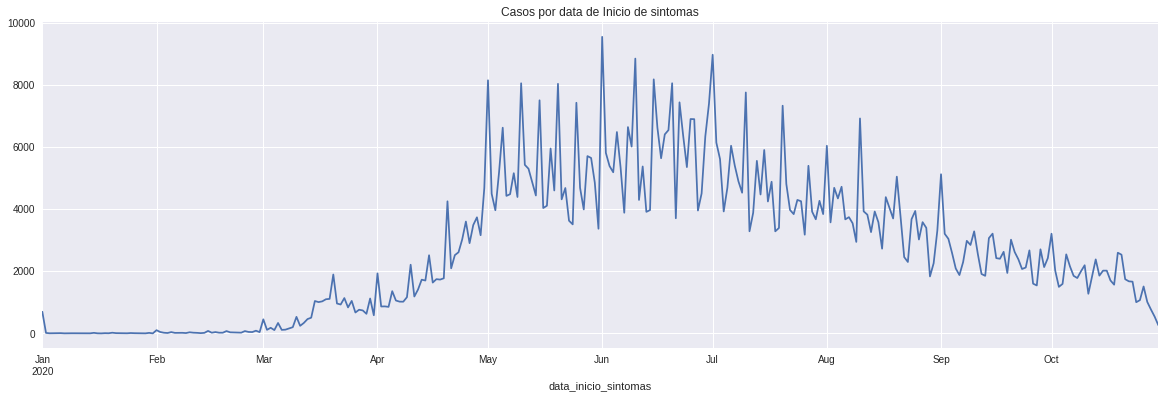

In [95]:
ts = df_casos.groupby(['data_inicio_sintomas']).data_inicio_sintomas.count()
ts.plot(figsize=(20,6), title='Casos por data de Inicio de sintomas')

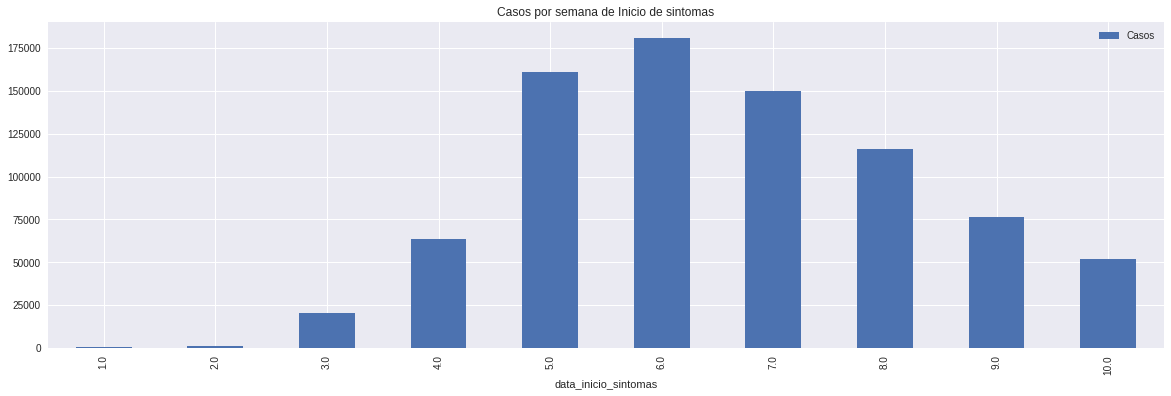

In [96]:
df_por_semana = df_casos.groupby(df_casos['data_inicio_sintomas'].dt.month).size().reset_index().rename(columns={0: 'Casos'}).set_index('data_inicio_sintomas')
df_por_semana.plot(kind='bar', figsize=(20, 6), title='Casos por semana de Inicio de sintomas')

## Casos por Resultado de exame

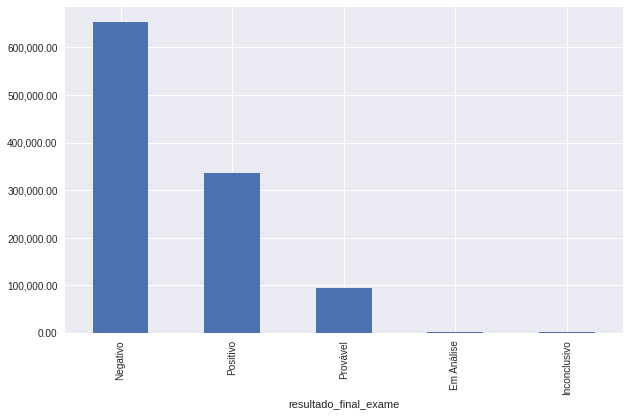

In [97]:
df_casos_por_resultado = df_casos.groupby(['resultado_final_exame']).resultado_final_exame.count()
df_casos_por_resultado_ordenado = df_casos_por_resultado.sort_values(ascending=False)
ax = df_casos_por_resultado_ordenado.plot(kind='bar', figsize=(10, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

## Curva Epidemilógica 

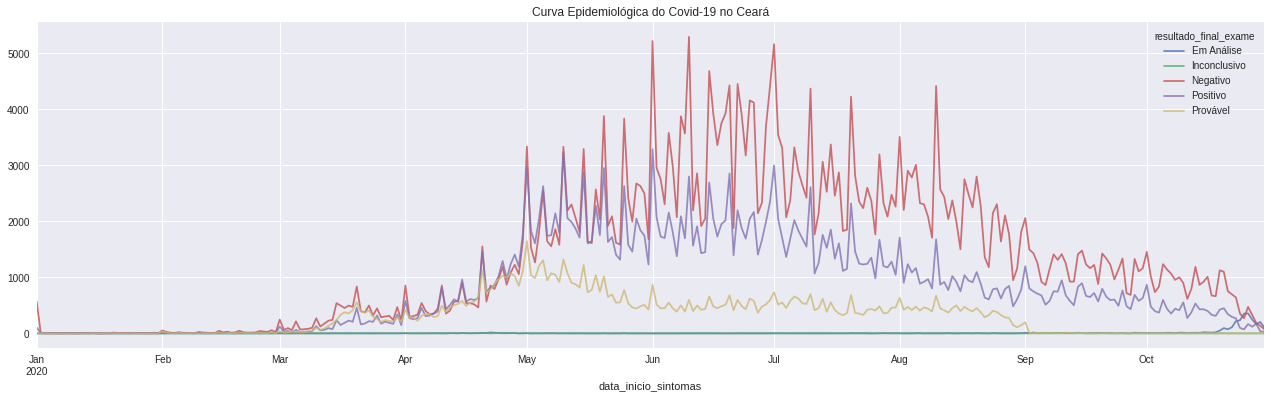

In [98]:
df_casos_por_dia_e_resultado = df_casos.groupby(['data_inicio_sintomas','resultado_final_exame'])[['id']].count().rename(columns={'id': 'Casos'})
df_casos_por_dia_e_resultado = df_casos_por_dia_e_resultado.reset_index()
df_casos_por_dia_e_resultado['Casos'] = df_casos_por_dia_e_resultado['Casos'].fillna(0)
df_casos_por_dia_e_resultado_pivot = df_casos_por_dia_e_resultado.pivot(index="data_inicio_sintomas", columns='resultado_final_exame',values="Casos")
ax = df_casos_por_dia_e_resultado_pivot.plot(alpha=0.8,figsize=(22,6), title='Curva Epidemiológica do Covid-19 no Ceará')


## Apenas os casos positivos

In [405]:
df_casos_positovos = df_casos[(df_casos["resultado_final_exame"] == 'Positivo')]
#df_casos_positovos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


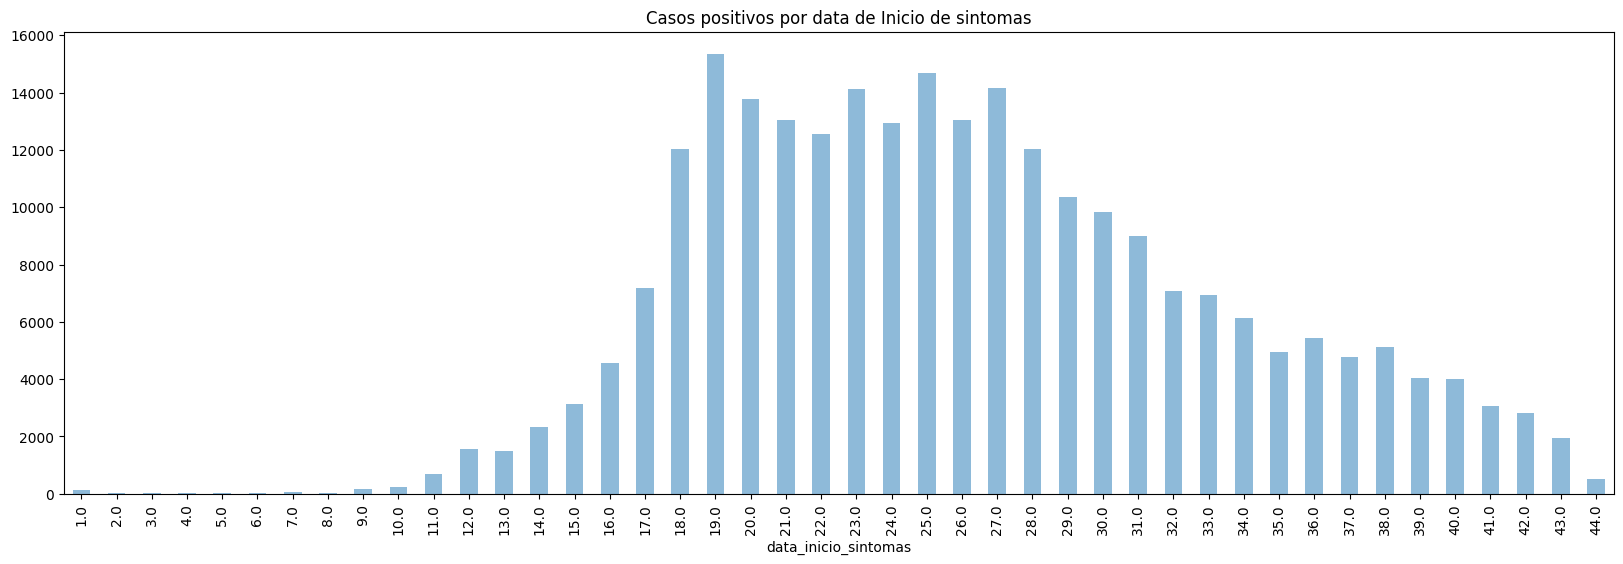

In [247]:
ts_positovos = df_casos_positovos.groupby(df_casos_positovos['data_inicio_sintomas'].dt.week).data_inicio_sintomas.count()
ts_positovos.plot(kind='bar',alpha=0.5,figsize=(20,6), title='Casos positivos por data de Inicio de sintomas')

In [150]:
df_casos_positovos_por_municipio = df_casos_positovos.groupby('municipio_paciente').municipio_paciente.count()

In [151]:
df_casos_positovos_por_municipio.sort_values(ascending=False).head()

municipio_paciente
FORTALEZA            73299
JUAZEIRO DO NORTE    17239
SOBRAL               13694
CRATO                 9420
MARACANAU             9339
Name: municipio_paciente, dtype: int64

In [406]:
df_casos_positovos_dropna = df_casos_positovos.dropna(subset=['longitude', 'latitude'])

In [407]:
df_casos_positovos_dropna[['longitude', 'latitude']]

,longitude,latitude
882,-3.834822e+08,-60311304.0
16897,-3.847986e+08,-37465647.0
17231,-3.861321e+08,-3876772.0
17235,-3.856642e+08,-38009335.0
17264,-3.856507e+08,-37080153.0
...,...,...
1146589,-3.896872e+08,-36099755.0
1146590,-3.572021e+08,-86683316.0
1146591,-3.885833e+14,-36581859.0
1146592,-3.883113e+08,-35566668.0


In [408]:
def util_func(x, comeca, termina): 
    try: 
      return float(str(x)[:comeca]+'.'+str(x)[comeca:termina])
    except ValueError: 
        pass

In [409]:

df_casos_positovos_dropna['latitude'] = df_casos_positovos_dropna['latitude'].apply(lambda x: util_func(x, 3, 9))
df_casos_positovos_dropna['longitude'] = df_casos_positovos_dropna['longitude'].apply(lambda x: util_func(x, 2, 8))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
#df_casos_positovos_dropna = df_casos_positovos.dropna(subset=['longitude_endereco_paciente', 'latitude_endereco_paciente'])

In [410]:
df_casos_positovos_dropna[['latitude','longitude']].head()

,latitude,longitude
882,-60.311304,-3.834821
16897,-37.465647,-3.847985
17231,NaN,-3.861320
17235,-38.009335,-3.856642
17264,-37.080153,-3.856506


In [296]:
df_casos_positovos_dropna[['longitude_endereco_paciente', 'latitude_endereco_paciente']].dtypes

longitude_endereco_paciente    float64
latitude_endereco_paciente     float64
dtype: object

In [287]:
#df_casos_positovos = df_casos[(df_casos["resultado_final_exame"] == 'Positivo')]
#df_casos_positovos_dropna['longitude_endereco_paciente'].min()
# latitude_endereco_paciente min = -7.83 max = -2.79
# longitude_endereco_paciente min = -41.41 max = -37.3
#df_casos_positovos_dropna["latitude_endereco_paciente"]

df_casos_positovos_dropna["longitude_endereco_paciente"] = df_casos_positovos_dropna[(df_casos_positovos_dropna["longitude_endereco_paciente"] <=-2.79)&
                          (df_casos_positovos_dropna["longitude_endereco_paciente"] >=-7.83)]


df_casos_positovos_dropna["latitude_endereco_paciente"] = df_casos_positovos_dropna[(df_casos_positovos_dropna["latitude_endereco_paciente"] <=-37.30)&
                          (df_casos_positovos_dropna["latitude_endereco_paciente"] >=-41.41)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [299]:
#df_casos_positovos_dropna[(df_casos_positovos_dropna["latitude_endereco_paciente"] <=-37.30)&
#                          (df_casos_positovos_dropna["latitude_endereco_paciente"] >=-41.41)]

In [300]:
#df_casos_positovos_dropna[(df_casos_positovos_dropna["longitude_endereco_paciente"] <=-2.79)&
#                          (df_casos_positovos_dropna["longitude_endereco_paciente"] >=-7.83)]

In [316]:
teste = df_casos_positovos_dropna

In [317]:
teste = teste[(teste["latitude_endereco_paciente"] >=-41.41) & (teste["latitude_endereco_paciente"] <=-37.30) ]

In [318]:
teste["latitude_endereco_paciente"]

16897     -37.465647
17235     -38.009335
17268     -37.304512
17356     -37.304512
17359     -38.889838
             ...    
1146564   -37.812313
1146570   -37.928833
1146572   -37.983478
1146577   -37.304512
1146583   -39.042693
Name: latitude_endereco_paciente, Length: 70204, dtype: float64

In [319]:
teste = teste[(teste["longitude_endereco_paciente"] >=-7.83)&(df_casos_positovos_dropna["longitude_endereco_paciente"] <=-2.79)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [320]:
teste["longitude_endereco_paciente"]

16897     -3.847985
17235     -3.856642
17268     -3.852179
17356     -3.852179
17359     -3.845465
             ...   
1146564   -3.856712
1146570   -3.853923
1146572   -3.857043
1146577   -3.852179
1146583   -3.838675
Name: longitude_endereco_paciente, Length: 70200, dtype: float64

In [415]:
teste[['longitude_endereco_paciente', 'latitude_endereco_paciente']]

,longitude_endereco_paciente,latitude_endereco_paciente
16897,-3.847985,-37.465647
17235,-3.856642,-38.009335
17268,-3.852179,-37.304512
17356,-3.852179,-37.304512
17359,-3.845465,-38.889838
...,...,...
1146564,-3.856712,-37.812313
1146570,-3.853923,-37.928833
1146572,-3.857043,-37.983478
1146577,-3.852179,-37.304512


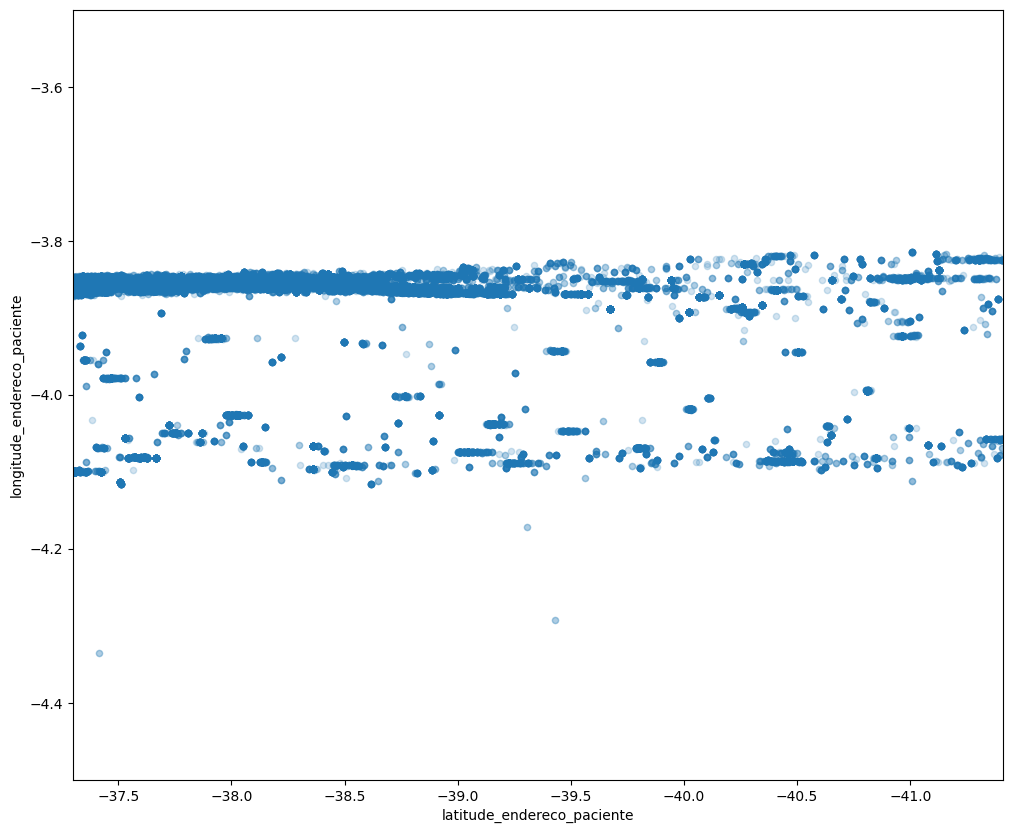

In [327]:
teste.plot(kind="scatter", x="latitude_endereco_paciente", y="longitude_endereco_paciente", xlim=(-37.30,-41.41),ylim=(-4.5,-3.5), alpha=0.2, figsize=(12,10))
plt.show()

In [336]:
!pip install folium
!pip install requests

In [337]:
import folium
import requests

In [ ]:
laMap = folium.Map(location=[34.0522,-118.2437], tiles='Stamen Toner', zoom_start=9)

#add the shape of LA County to the map
folium.GeoJson(laArea).add_to(laMap)

#for each row in the Starbucks dataset, plot the corresponding latitude and longitude on the map
for i,row in df.iterrows():
    folium.CircleMarker((row.latitude,row.longitude), radius=3, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(laMap)

#add the heatmap. The core parameters are:
#--data: a list of points of the form (latitude, longitude) indicating locations of Starbucks stores

#--radius: how big each circle will be around each Starbucks store

#--blur: the degree to which the circles blend together in the heatmap

laMap.add_children(plugins.HeatMap(data=df[['latitude', 'longitude']].as_matrix(), radius=25, blur=10))

#save the map as an html
laMap.save('laHeatmap.html')

In [439]:
#initializando o mapa de Ceará

mapa_nordeste = folium.Map(location=[-4.789167, -38.547110],zoom_start=7, tiles="Stamen Toner") #tiles='Stamen Terrain'


In [440]:
headers = {
    'Content-Type': 'application/json;charset=UTF-8',
    'User-Agent': 'google-colab',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
}
estado_jsons = requests.get("https://servicodados.ibge.gov.br/api/v2/malhas/23/?formato=application/vnd.geo+json&resolucao=3",
                           headers=headers)
estado_json = estado_jsons.json()
estado_json2 = estado_json
folium.GeoJson(estado_json).add_to(mapa_nordeste)

In [ ]:
for i, row in teste.iterrows():
    folium.CircleMarker((row.latitude_endereco_paciente,row.longitude_endereco_paciente), radius=3, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(mapa_nordeste)

In [441]:
mapa_nordeste